# Final Project
### Halina Vercessi-Clarke and Hannah Nguyen

In [2]:
#importing the libraries
import os 
import cv2
import numpy as np
from skimage import io
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pathlib
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [3]:
#importing scikit learning modules
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

from data.data_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [3]:
# Important: Use seed of 0
np.random.seed(0)

In [31]:

# file_path = 'C:/Users/Halina/Documents/GitHub/Fashion-throughout-the-Years/images'
file_path = os.getcwd() + '\imagesUPDATED-Dresses'
data = [] 
labels = []
i = 0
label_names = os.listdir(file_path)
classes = []

for root, dirs, files in os.walk(file_path):
    #print(dirs)
    path = str(root).replace(str(chr(92)), "/")
    go = False
    if 'dresses' in path:
        go = True
    if (path.split("/")[-1]!='imagesUPDATED-Dresses') and (go == True):

        classes.append([label_names[i].split(" ")[0]])
        #print(path)
        #print("\n")
        for img in os.listdir(path):
            #print(img)
            pic = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            thresh = 128
            img_binary = cv2.threshold(pic, thresh, 255, cv2.THRESH_BINARY)[1]
            img = cv2.resize(img_binary,(80,80))
            
            data.append(img)

            labels.append([i])
        i+=1


In [32]:
print(len(classes))
#classes

31


In [7]:
print(len(labels))
labels[0:8]

706


[[0], [0], [0], [0], [0], [0], [0], [0]]

In [8]:
data = np.asarray(data)
labels = np.asarray(labels)
#print(data[344])
#print(labels[344])
#data[0].flatten()

In [9]:
print(data[344].shape)
#plt.imshow(saved[0].reshape(80,80,3))
print(data.shape)

(80, 80)
(706, 80, 80)


In [10]:
#plt.imshow(data[350].reshape(80, 80))

In [11]:
# Split the dataset
train_images, test_images, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 0)

In [12]:
train_images.shape

(529, 80, 80)

In [13]:
test_images.shape

(177, 80, 80)

In [14]:
train_labels.shape

(529, 1)

In [15]:
test_labels.shape

(177, 1)

In [16]:
# plt.figure()
# plt.imshow(train_images[0])
# plt.colorbar()
# plt.grid(False)
# plt.show()


In [17]:
train_images_norm = np.asarray(train_images / 255.0)
test_images_norm = np.asarray(test_images / 255.0)
print(train_images_norm[2])
print(train_images_norm.shape)

[[1.         1.         1.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.10588235 0.         0.47058824 ... 0.         0.         0.        ]
 [0.         0.31764706 0.         ... 0.         0.         0.        ]]
(529, 80, 80)


In [18]:
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     plt.xlabel(classes[int(train_labels[i][0])][0])
# plt.show()


In [19]:
from keras.utils import np_utils 
train_labels_1hot = np_utils.to_categorical(train_labels)
test_labels_1hot = np_utils.to_categorical(test_labels)
print(train_labels_1hot[2].shape)


(31,)


In [20]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(80,80,3)))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(1000, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(500, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(250, activation='relu'))
# model.add(tf.keras.layers.Dense(87, activation='softmax'))

model2 = tf.keras.Sequential([
  layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(80,80,1)),
  layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  #layers.Dropout(0.5), 
  #layers.Dense(75, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  layers.Dense(31, activation='softmax')
])


model = Sequential([  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  layers.Conv2D(16, 3, padding='same', activation='relu'),  layers.MaxPooling2D(),  layers.Conv2D(32, 3, padding='same', activation='relu'),  layers.MaxPooling2D(),  layers.Conv2D(64, 3, padding='same', activation='relu'),  layers.MaxPooling2D(),  layers.Flatten(),  layers.Dense(128, activation='relu'),  layers.Dense(num_classes)])



In [21]:
model2.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
print(model2.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 76, 76, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 38, 38, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 92416)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               11829376  
_________________________________________________________________
dense_1 (Dense)              (None, 31)                3999      
Total params: 11,852,191
Trainable params: 11,852,191
Non-trainable params: 0
____________________________________________

In [23]:
hist_model2 = model2.fit(train_images_norm, train_labels_1hot, validation_data=(test_images_norm, test_labels_1hot), batch_size=2, epochs=15)

C:\Users\18025\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/15
265/265 [==============================] - 57s 216ms/step - loss: 3.6925 - accuracy: 0.1474 - val_loss: 3.3000 - val_accuracy: 0.2542
Epoch 2/15
265/265 [==============================] - 57s 214ms/step - loss: 2.4484 - accuracy: 0.5501 - val_loss: 3.0882 - val_accuracy: 0.4520
Epoch 3/15
265/265 [==============================] - 55s 207ms/step - loss: 1.0533 - accuracy: 0.9414 - val_loss: 3.0491 - val_accuracy: 0.4633
Epoch 4/15
265/265 [==============================] - 55s 208ms/step - loss: 0.8287 - accuracy: 0.9509 - val_loss: 2.8423 - val_accuracy: 0.4407
Epoch 5/15
265/265 [==============================] - 54s 204ms/step - loss: 0.6662 - accuracy: 0.9584 - val_loss: 2.8084 - val_accuracy: 0.4463
Epoch 6/15
265/265 [==============================] - 54s 205ms/step - loss: 0.5680 - accuracy: 0.9565 - val_loss: 2.7730 - val_accuracy: 0.4520
Epoch 7/15
265/265 [==============================] - 56s 211ms/step - loss: 0.5246 - accuracy: 0.9641 - val_loss: 2.8946 - val_ac

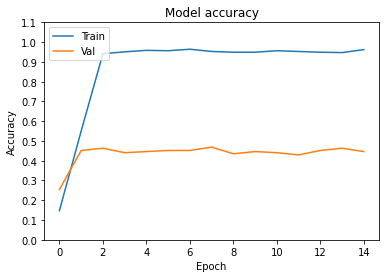

In [24]:
#Visualize the models accuracy
plt.plot(hist_model2.history['accuracy'])
plt.plot(hist_model2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.yticks(np.arange(0, 1.2, .1))
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [150]:
#model2.evaluate(test_images, test_labels, batch_size=1)

In [ ]:
# Predictions on unseen images

In [33]:
file_path2 = os.getcwd() + '\prediction_Images2020'
data_2020 = [] 
labels_2020 = []
i = 0
label_names_2020 = os.listdir(file_path2)
classes_2020 = []

for root, dirs, files in os.walk(file_path2):
    path = str(root).replace(str(chr(92)), "/")
    go = False
    if '2020' in path:
        go = True
    if (path.split("/")[-1]!='prediction_Images2020') and (go == True):

        classes_2020.append([label_names_2020[i]])
        for img in os.listdir(path):
            pic = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            thresh = 128
            img_binary = cv2.threshold(pic, thresh, 255, cv2.THRESH_BINARY)[1]
            img = cv2.resize(img_binary,(80,80))
            
            data_2020.append(img/255.0)

            labels_2020.append([i])
        i+=1


In [34]:

data_2020 = np.asarray(data_2020)
data_2020_norm = np.asarray(data_2020/255.0)

labels_2020 = np.asarray(labels)

In [35]:
# probability_model = tf.keras.Sequential([model2, 
#                                          tf.keras.layers.Softmax()])
# # Try with images it's already seen to test display...
# predictions = probability_model.predict(train_images_norm)

In [63]:
probability_model = tf.keras.Sequential([model2, 
                                         tf.keras.layers.Softmax()])
# Try with images it's already seen to test display...
predictions = probability_model.predict(data_2020_norm)

[0.03224049 0.0323071  0.03218953 0.03229231 0.03242341 0.03247553
 0.03232696 0.03232502 0.03234375 0.03235384 0.03249243 0.03231094
 0.03243182 0.03238389 0.03225708 0.03228007 0.0323449  0.03227178
 0.03213178 0.03214437 0.03219104 0.03205349 0.03214273 0.03221859
 0.03227646 0.03213663 0.03207245 0.03214637 0.03213766 0.03224769
 0.03205001]
10
1920


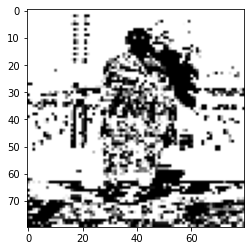

In [64]:
plt.imshow(data_2020_norm[30], cmap=plt.cm.binary)
print(predictions[30])
print(np.argmax(predictions[30]))
print(classes[np.argmax(predictions[30])][0])

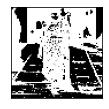

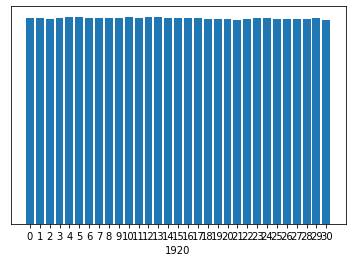

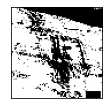

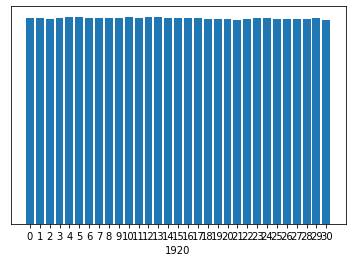

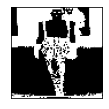

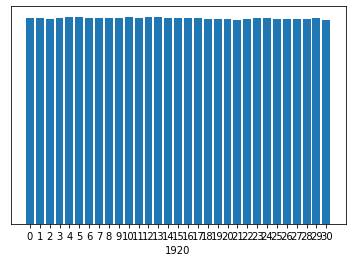

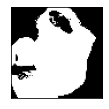

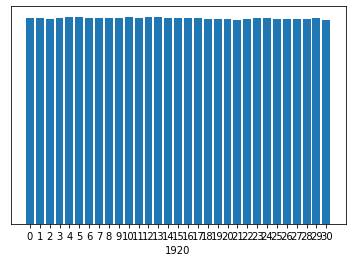

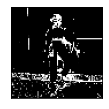

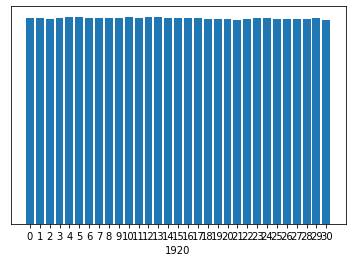

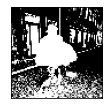

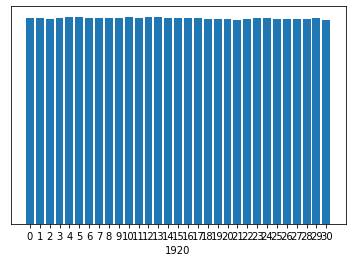

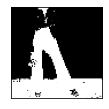

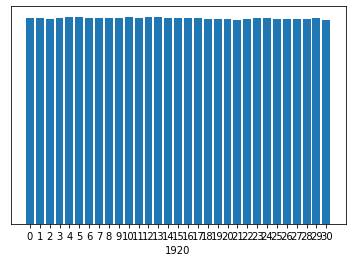

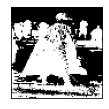

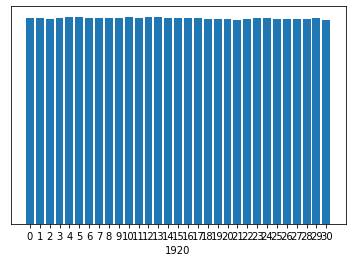

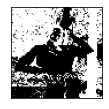

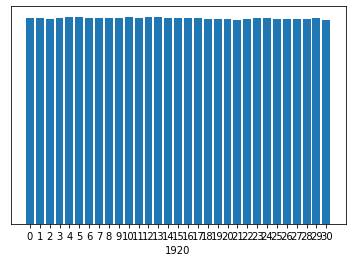

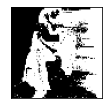

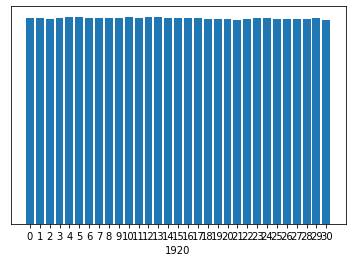

In [72]:
rows = 30
cols = 30

for i in range(15, 25):
    plt.figure(figsize=(4*cols, 2*rows))
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data_2020_norm[i], cmap=plt.cm.binary)
    plt.show()
    plt.bar(range(31), 10*predictions[i])
    plt.xticks(range(31))
    plt.xlabel(classes[np.argmax(predictions[i])][0])
    plt.yticks([])
    
    plt.show()

# for i in range(10, 13):
#     #plt.subplot(rows, 2*cols, 2*i+2)

#     plt.bar(range(31), 10*predictions[i])
#     plt.xticks(range(31))
#     plt.xlabel(classes[np.argmax(predictions[i])][0])
#     plt.yticks([])
#     plt.show()

In [108]:
# PCA Model using SVC

In [ ]:
train_images.flatten()
test_images.flatten()

In [61]:
# Preprocess all images in data array
def vectorize_images(images):
    img_array = []
    for img in images:
        #img = np.asmatrix(img)
        img = img.flatten()/255.0
        img_array.append(img)
    
    return img_array

images_vectorized = vectorize_images(data)

In [62]:
print(images_vectorized)

[array([1., 1., 1., ..., 0., 0., 0.]), array([1.        , 1.        , 1.        , ..., 0.82745098, 0.18823529,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 1., 1., 1.]), array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]), array([0., 0., 0., ..., 1., 1., 1.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]), array([1., 1., 1., ..., 0., 0., 0.]), array([0., 0., 0., ..., 1., 1., 1.]), array([1., 1., 1., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]), array([1., 1., 1., ..., 1., 1., 1.]), array([1., 1., 1., ..., 0., 0., 0.]), array([0., 0., 0., ..., 1., 1., 1.]), array([1., 1., 1., ..., 1., 1., 1.]), array([0., 0., 0., ..., 1., 1., 1.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 

In [63]:
# Find best parameters combination for SVC model using bruteforce method
def SVC_model(X, y):
    svc_model = SVC()
    
    # Test C and gamma parameters to find best combination
    parameter_options = {'C':[1,10,100],'gamma':[0.001,0.005,0.01]}
    clf = GridSearchCV(svc_model, parameter_options, n_jobs=-1, cv=2)
    
    # Search for the best parameters
    clf.fit(X, y)
    #print("Best parameter combination: ", clf.best_params_)
    return clf.best_estimator_

In [64]:
def PCA_Accuracy(X, y):

    # Split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # Reduce to 16 components
    pca_model = PCA(n_components = 16)
    pca_model.fit(X_train)
    reduced_X_train = pca_model.transform(X_train)
    reduced_X_test = pca_model.transform(X_test)
    
    svc_model = SVC_model(reduced_X_train, y_train)
    pred = svc_model.predict(reduced_X_test)
    
    return np.asarray([svc_model, accuracy_score(y_test, pred)])

In [65]:
labels_1hot = np_utils.to_categorical(labels)
print(labels_1hot[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


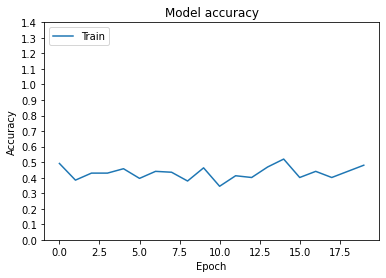

In [69]:
labels_1D = labels.flatten()

scores = []
for i in range(20):
    accuracy_score_images = PCA_Accuracy(images_vectorized, labels_1D)
    scores.append(accuracy_score_images[1])
plt.plot(scores)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.yticks(np.arange(0, 1.5, .1))
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
